# **BGR/RGB Channel Operations with OpenCV**

## Overview
This notebook provides comprehensive coverage of color channel manipulation and analysis:
- **Channel Separation**: Extracting individual B, G, R channels
- **Channel Analysis**: Understanding channel contributions to images
- **Channel Manipulation**: Modifying individual channels for effects
- **Color Space Operations**: BGR ↔ RGB conversions and workflows
- **Advanced Techniques**: Channel blending, masking, and enhancement

Master color channel operations for image processing, computer vision, and creative effects.


In [3]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Verify libraries
print(f"✅ OpenCV     Version: {cv2.__version__}")
print(f"✅ NumPy      Version: {np.__version__}")
print(f"✅ Matplotlib Version: {plt.matplotlib.__version__}")

# Create output directory
os.makedirs('../assets/outputs/02_rgb_channel_operations', exist_ok=True)
print("✅ Channel operations setup completed!")

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10

✅ OpenCV     Version: 4.10.0
✅ NumPy      Version: 1.26.4
✅ Matplotlib Version: 3.10.0
✅ Channel operations setup completed!


## **1. Understanding Color Channels**

### BGR vs RGB Color Formats:
| Format | Channel Order | Used By | Index Access |
|--------|---------------|---------|--------------|
| **BGR** | Blue-Green-Red | OpenCV, OpenGL | `img[:,:,0]` = Blue<br>`img[:,:,1]` = Green<br>`img[:,:,2]` = Red |
| **RGB** | Red-Green-Blue | PIL, Matplotlib, Web | `img[:,:,0]` = Red<br>`img[:,:,1]` = Green<br>`img[:,:,2]` = Blue |

### Key Concepts:
- **Channel**: Single color component (8-bit: 0-255 values)
- **Grayscale Channel**: Single-channel representation of color contribution
- **Channel Isolation**: Viewing individual color components
- **Channel Modification**: Enhancing or suppressing specific colors

In [4]:
# Load and analyze a color image
print("🖼️ Loading color image for channel analysis...")

# Load image (BGR format by default in OpenCV)
image_path = '../assets/input-images/image1.png'
img_bgr = cv2.imread(image_path)

if img_bgr is not None:
    print(f"✅ Image loaded successfully")
    print(f"📊 Image properties:")
    print(f"   • Shape        : {img_bgr.shape}")
    print(f"   • Data type    : {img_bgr.dtype}")
    print(f"   • Channels     : {img_bgr.shape[2]} (BGR format)")
    print(f"   • Size         : {img_bgr.size:,} total pixels")
    
    # Get image dimensions
    height, width, channels = img_bgr.shape
    print(f"   • Dimensions   : {width} × {height} pixels")
    
    # Calculate memory usage
    memory_mb = img_bgr.nbytes / (1024 * 1024)
    print(f"   • Memory usage : {memory_mb:.2f} MB")
    
    # Display original image
    cv2.imshow('Original Image (BGR)', img_bgr)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
else:
    print("❌ Failed to load image. Please check the file path.")
    # Create a sample image for demonstration
    print("🎨 Creating sample image for demonstration...")
    img_bgr = np.zeros((300, 400, 3), dtype=np.uint8)
    
    # Create colorful sample
    img_bgr[:100, :, 0]     = 255  # Blue region
    img_bgr[100:200, :, 1]  = 255  # Green region  
    img_bgr[200:, :, 2]     = 255  # Red region
    
    print("✅ Sample image created with distinct color regions")

🖼️ Loading color image for channel analysis...
✅ Image loaded successfully
📊 Image properties:
   • Shape        : (486, 739, 3)
   • Data type    : uint8
   • Channels     : 3 (BGR format)
   • Size         : 1,077,462 total pixels
   • Dimensions   : 739 × 486 pixels
   • Memory usage : 1.03 MB


## **2. Channel Separation & Analysis**

Extract and analyze individual color channels to understand their contributions to the final image.

In [5]:
# Separate and analyze individual channels
print("🔍 Extracting and analyzing individual color channels...")

if img_bgr is not None:
    # Extract individual channels (BGR format)
    blue_channel  = img_bgr[:, :, 0]   # Blue channel
    green_channel = img_bgr[:, :, 1]   # Green channel  
    red_channel   = img_bgr[:, :, 2]   # Red channel
    
    print("✅ Channels extracted successfully")
    print(f"📊 Channel properties:")
    print(f"   • Blue  channel shape: {blue_channel.shape}")
    print(f"   • Green channel shape: {green_channel.shape}")
    print(f"   • Red   channel shape: {red_channel.shape}")
    
    # Analyze channel statistics
    channels = [
        ("Blue", blue_channel, (255, 0, 0)),    # Display in blue color
        ("Green", green_channel, (0, 255, 0)),  # Display in green color
        ("Red", red_channel, (0, 0, 255))       # Display in red color
    ]
    
    print("\n📈 Channel Statistics:")
    for name, channel, color in channels:
        print(f"   • {name} Channel:")
        print(f"     - Min value    : {np.min(channel)}")
        print(f"     - Max value    : {np.max(channel)}")
        print(f"     - Mean value   : {np.mean(channel):.2f}")
        print(f"     - Std deviation: {np.std(channel):.2f}")
    
    # Display channels individually using OpenCV
    print("\n🖼️ Displaying individual channels...")
    print("💡 Press any key to advance through channels...")
    
    # Show each channel as grayscale
    cv2.imshow('Blue Channel (Grayscale)', blue_channel)
    cv2.waitKey(0)
    
    cv2.imshow('Green Channel (Grayscale)', green_channel)
    cv2.waitKey(0)
    
    cv2.imshow('Red Channel (Grayscale)', red_channel)
    cv2.waitKey(0)
    
    cv2.destroyAllWindows()
    
    # Create color-tinted versions of each channel
    print("🎨 Creating color-tinted channel visualizations...")
    
    # Blue channel in blue color
    blue_colored = np.zeros_like(img_bgr)
    blue_colored[:, :, 0] = blue_channel  # Only blue channel active
    
    # Green channel in green color
    green_colored = np.zeros_like(img_bgr) 
    green_colored[:, :, 1] = green_channel  # Only green channel active
    
    # Red channel in red color
    red_colored = np.zeros_like(img_bgr)
    red_colored[:, :, 2] = red_channel  # Only red channel active
    
    # Display color-tinted channels
    cv2.imshow('Blue Channel (Blue Tinted)', blue_colored)
    cv2.waitKey(0)
    
    cv2.imshow('Green Channel (Green Tinted)', green_colored)
    cv2.waitKey(0)
    
    cv2.imshow('Red Channel (Red Tinted)', red_colored)
    cv2.waitKey(0)
    
    cv2.destroyAllWindows()
    
    # Save individual channels
    cv2.imwrite('../assets/outputs/02_rgb_channel_operations/blue_channel.png', blue_channel)
    cv2.imwrite('../assets/outputs/02_rgb_channel_operations/green_channel.png', green_channel)
    cv2.imwrite('../assets/outputs/02_rgb_channel_operations/red_channel.png', red_channel)
    cv2.imwrite('../assets/outputs/02_rgb_channel_operations/blue_colored.png', blue_colored)
    cv2.imwrite('../assets/outputs/02_rgb_channel_operations/green_colored.png', green_colored)
    cv2.imwrite('../assets/outputs/02_rgb_channel_operations/red_colored.png', red_colored)
    
    print("✅ Channel analysis completed!")
    print("💾 Individual channels saved to outputs folder")

else:
    print("❌ No image available for channel analysis")

🔍 Extracting and analyzing individual color channels...
✅ Channels extracted successfully
📊 Channel properties:
   • Blue  channel shape: (486, 739)
   • Green channel shape: (486, 739)
   • Red   channel shape: (486, 739)

📈 Channel Statistics:
   • Blue Channel:
     - Min value    : 2
     - Max value    : 255
     - Mean value   : 185.67
     - Std deviation: 91.55
   • Green Channel:
     - Min value    : 0
     - Max value    : 255
     - Mean value   : 169.74
     - Std deviation: 102.05
   • Red Channel:
     - Min value    : 22
     - Max value    : 255
     - Mean value   : 206.58
     - Std deviation: 53.74

🖼️ Displaying individual channels...
💡 Press any key to advance through channels...
🎨 Creating color-tinted channel visualizations...
✅ Channel analysis completed!
💾 Individual channels saved to outputs folder


📊 Creating comprehensive channel visualization...


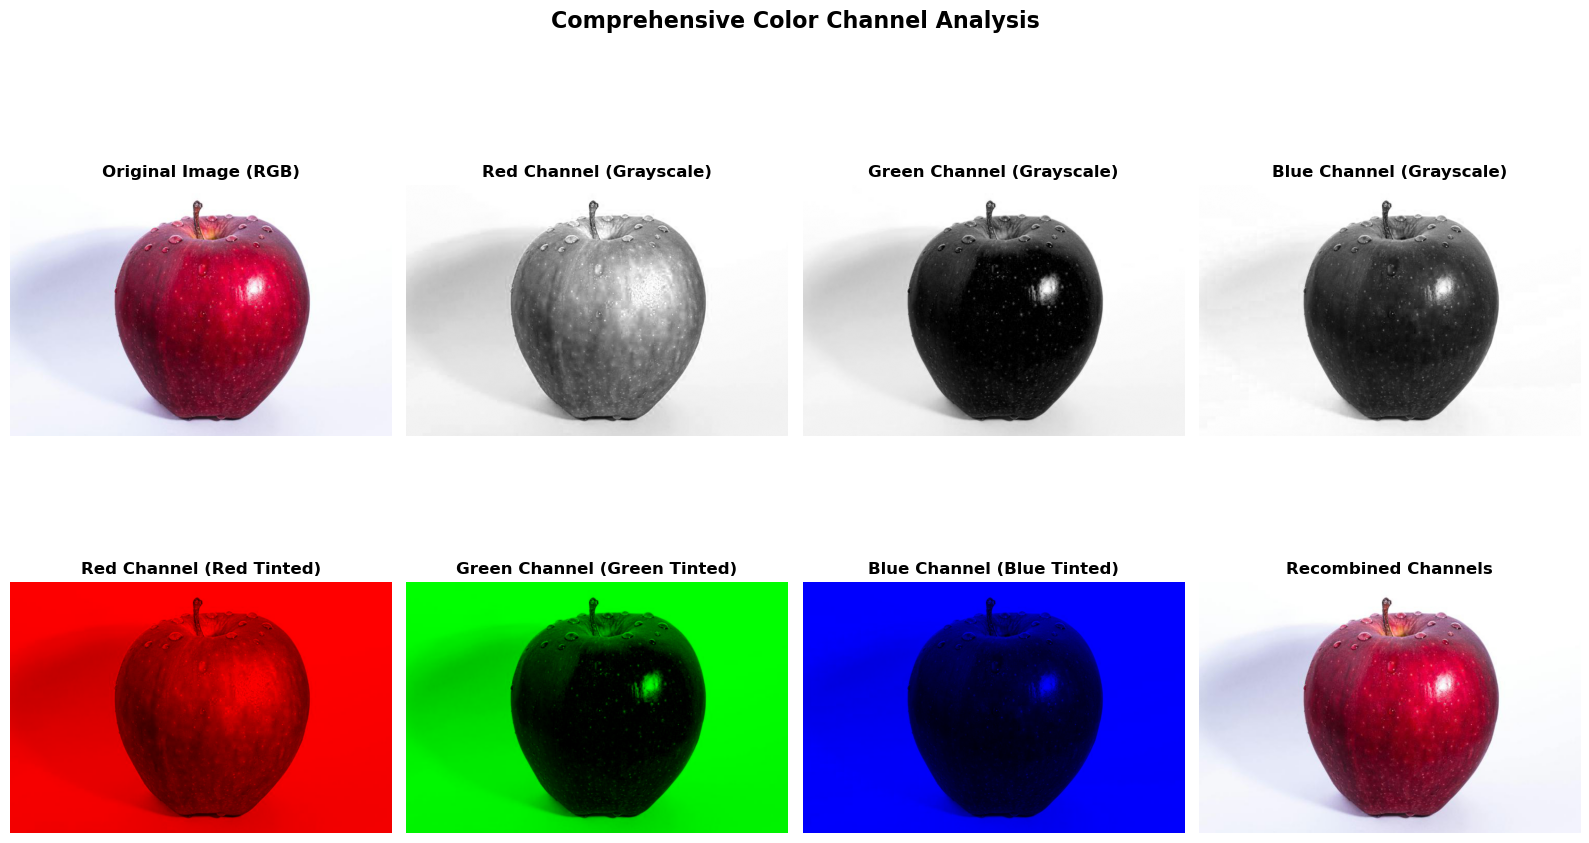

✅ Comprehensive channel visualization created
💾 Visualization saved as 'channel_analysis_grid.png'


In [6]:
# Advanced channel visualization with matplotlib
print("📊 Creating comprehensive channel visualization...")

if img_bgr is not None:
    # Convert BGR to RGB for matplotlib display
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # Extract channels in RGB format for proper matplotlib display
    red_channel_rgb   = img_rgb[:, :, 0]
    green_channel_rgb = img_rgb[:, :, 1] 
    blue_channel_rgb  = img_rgb[:, :, 2]
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 4, figsize=(16, 10))
    fig.suptitle('Comprehensive Color Channel Analysis', fontsize=16, fontweight='bold')
    
    # Row 1: Original and individual channels (grayscale)
    axes[0, 0].imshow(img_rgb)
    axes[0, 0].set_title('Original Image (RGB)', fontweight='bold')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(red_channel_rgb, cmap='gray')
    axes[0, 1].set_title('Red Channel (Grayscale)', fontweight='bold')
    axes[0, 1].axis('off')
    
    axes[0, 2].imshow(green_channel_rgb, cmap='gray')
    axes[0, 2].set_title('Green Channel (Grayscale)', fontweight='bold')
    axes[0, 2].axis('off')
    
    axes[0, 3].imshow(blue_channel_rgb, cmap='gray')
    axes[0, 3].set_title('Blue Channel (Grayscale)', fontweight='bold')
    axes[0, 3].axis('off')
    
    # Row 2: Color-tinted channels
    # Red channel in red
    red_tinted = np.zeros_like(img_rgb)
    red_tinted[:, :, 0] = red_channel_rgb
    axes[1, 0].imshow(red_tinted)
    axes[1, 0].set_title('Red Channel (Red Tinted)', fontweight='bold')
    axes[1, 0].axis('off')
    
    # Green channel in green  
    green_tinted = np.zeros_like(img_rgb)
    green_tinted[:, :, 1] = green_channel_rgb
    axes[1, 1].imshow(green_tinted)
    axes[1, 1].set_title('Green Channel (Green Tinted)', fontweight='bold')
    axes[1, 1].axis('off')
    
    # Blue channel in blue
    blue_tinted = np.zeros_like(img_rgb)
    blue_tinted[:, :, 2] = blue_channel_rgb
    axes[1, 2].imshow(blue_tinted)
    axes[1, 2].set_title('Blue Channel (Blue Tinted)', fontweight='bold')
    axes[1, 2].axis('off')
    
    # Combined channels (should match original)
    combined = red_tinted + green_tinted + blue_tinted
    axes[1, 3].imshow(combined)
    axes[1, 3].set_title('Recombined Channels', fontweight='bold')
    axes[1, 3].axis('off')
    
    plt.tight_layout()
    plt.savefig('../assets/outputs/02_rgb_channel_operations/channel_analysis_grid.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Comprehensive channel visualization created")
    print("💾 Visualization saved as 'channel_analysis_grid.png'")

else:
    print("❌ No image available for matplotlib visualization")

## **3. Channel Histograms & Distribution Analysis**

Analyze the distribution of pixel values in each color channel to understand image characteristics.

📈 Analyzing channel histograms and distributions...
🔢 Calculating histograms...


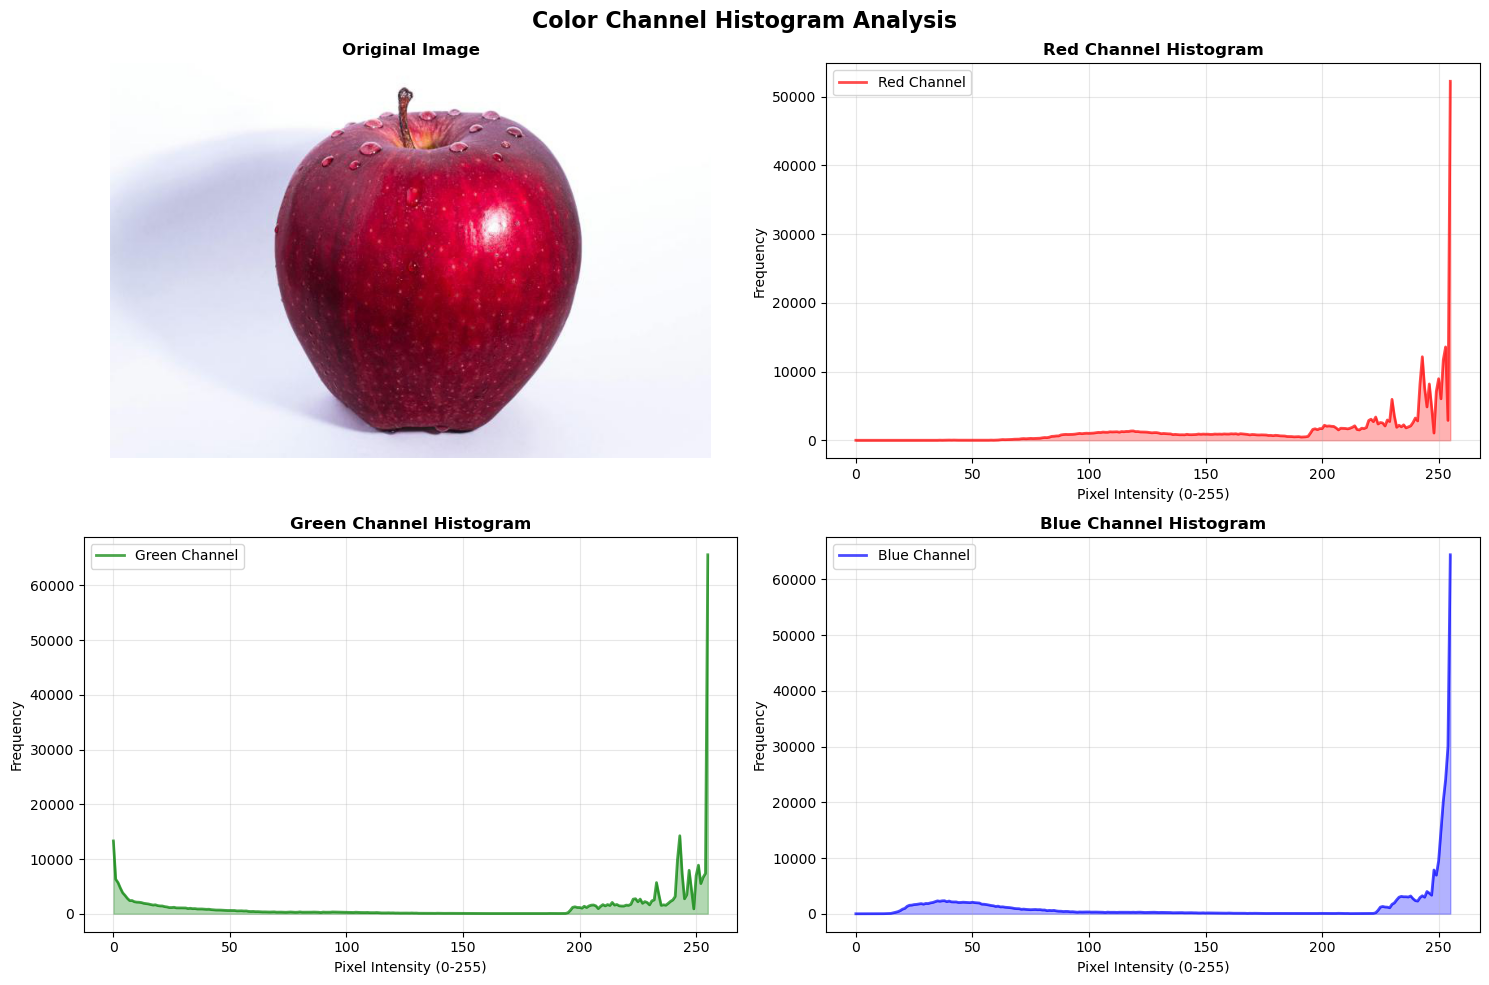

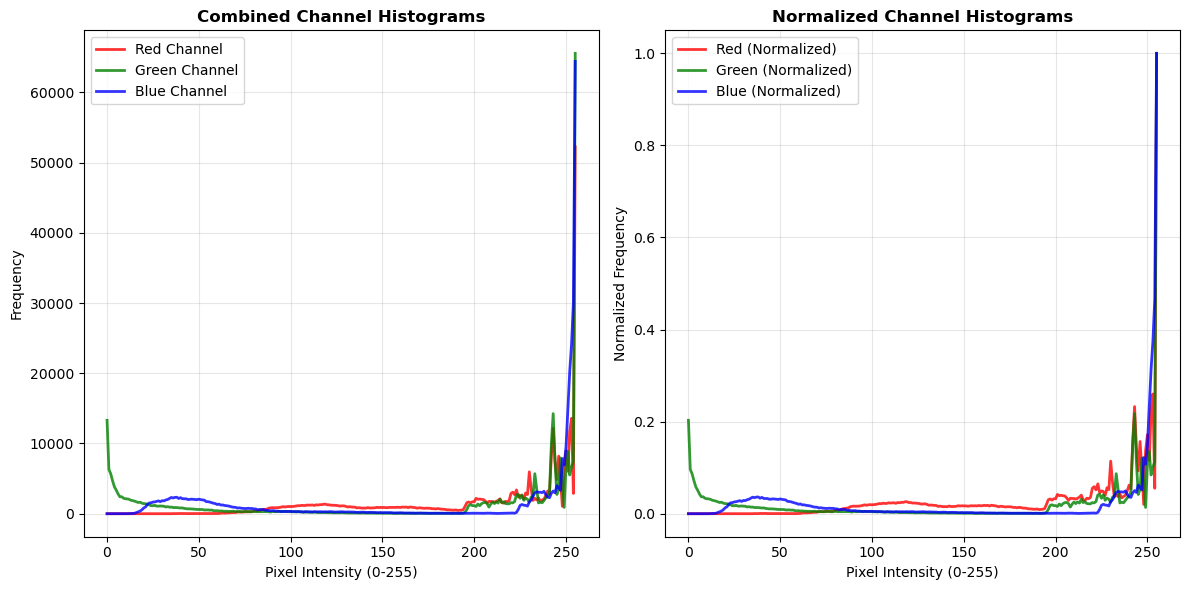

📊 Histogram Analysis Results:

🎨 Red Channel Statistics:
   • Peak intensity : 255
   • Peak frequency : 52255
   • Total pixels   : 359154
   • Mean intensity : 206.58
   • Dark pixels (0-84)     : 6069 (1.7%)
   • Mid pixels (85-169)    : 83919 (23.4%)
   • Bright pixels (170-255): 269166 (74.9%)

🎨 Green Channel Statistics:
   • Peak intensity : 255
   • Peak frequency : 65566
   • Total pixels   : 359154
   • Mean intensity : 169.74
   • Dark pixels (0-84)     : 107375 (29.9%)
   • Mid pixels (85-169)    : 13248 (3.7%)
   • Bright pixels (170-255): 238531 (66.4%)

🎨 Blue Channel Statistics:
   • Peak intensity : 255
   • Peak frequency : 64415
   • Total pixels   : 359154
   • Mean intensity : 185.67
   • Dark pixels (0-84)     : 98458 (27.4%)
   • Mid pixels (85-169)    : 20449 (5.7%)
   • Bright pixels (170-255): 240247 (66.9%)

✅ Histogram analysis completed!
💾 Histogram visualizations saved


In [7]:
# Analyze channel histograms and distributions
print("📈 Analyzing channel histograms and distributions...")

if img_bgr is not None:
    # Calculate histograms for each channel
    print("🔢 Calculating histograms...")
    
    # BGR channels (OpenCV format)
    hist_blue  = cv2.calcHist([img_bgr], [0], None, [256], [0, 256])
    hist_green = cv2.calcHist([img_bgr], [1], None, [256], [0, 256])
    hist_red   = cv2.calcHist([img_bgr], [2], None, [256], [0, 256])
    
    # Create histogram visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Color Channel Histogram Analysis', fontsize=16, fontweight='bold')
    
    # Original image
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    axes[0, 0].imshow(img_rgb)
    axes[0, 0].set_title('Original Image', fontweight='bold')
    axes[0, 0].axis('off')
    
    # Individual channel histograms
    axes[0, 1].plot(hist_red, color='red', alpha=0.7, linewidth=2, label='Red Channel')
    axes[0, 1].fill_between(range(256), hist_red.flatten(), alpha=0.3, color='red')
    axes[0, 1].set_title('Red Channel Histogram', fontweight='bold')
    axes[0, 1].set_xlabel('Pixel Intensity (0-255)')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()
    
    axes[1, 0].plot(hist_green, color='green', alpha=0.7, linewidth=2, label='Green Channel')
    axes[1, 0].fill_between(range(256), hist_green.flatten(), alpha=0.3, color='green')
    axes[1, 0].set_title('Green Channel Histogram', fontweight='bold')
    axes[1, 0].set_xlabel('Pixel Intensity (0-255)')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()
    
    axes[1, 1].plot(hist_blue, color='blue', alpha=0.7, linewidth=2, label='Blue Channel')
    axes[1, 1].fill_between(range(256), hist_blue.flatten(), alpha=0.3, color='blue')
    axes[1, 1].set_title('Blue Channel Histogram', fontweight='bold')
    axes[1, 1].set_xlabel('Pixel Intensity (0-255)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.savefig('../assets/outputs/02_rgb_channel_operations/channel_histograms.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Combined histogram comparison
    plt.figure(figsize=(12, 6))
    
    # Combined histogram plot
    plt.subplot(1, 2, 1)
    plt.plot(hist_red, color='red', alpha=0.8, linewidth=2, label='Red Channel')
    plt.plot(hist_green, color='green', alpha=0.8, linewidth=2, label='Green Channel')
    plt.plot(hist_blue, color='blue', alpha=0.8, linewidth=2, label='Blue Channel')
    plt.title('Combined Channel Histograms', fontweight='bold')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Normalized histogram comparison
    plt.subplot(1, 2, 2)
    hist_red_norm = hist_red / np.max(hist_red)
    hist_green_norm = hist_green / np.max(hist_green) 
    hist_blue_norm = hist_blue / np.max(hist_blue)
    
    plt.plot(hist_red_norm, color='red', alpha=0.8, linewidth=2, label='Red (Normalized)')
    plt.plot(hist_green_norm, color='green', alpha=0.8, linewidth=2, label='Green (Normalized)')
    plt.plot(hist_blue_norm, color='blue', alpha=0.8, linewidth=2, label='Blue (Normalized)')
    plt.title('Normalized Channel Histograms', fontweight='bold')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../assets/outputs/02_rgb_channel_operations/combined_histograms.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Analyze histogram statistics
    print("📊 Histogram Analysis Results:")
    
    channels_data = [
        ("Red", hist_red, "red"),
        ("Green", hist_green, "green"), 
        ("Blue", hist_blue, "blue")
    ]
    
    for name, hist, color in channels_data:
        peak_intensity = np.argmax(hist)
        peak_frequency = np.max(hist)
        total_pixels   = np.sum(hist)
        
        print(f"\n🎨 {name} Channel Statistics:")
        print(f"   • Peak intensity : {peak_intensity}")
        print(f"   • Peak frequency : {int(peak_frequency)}")
        print(f"   • Total pixels   : {int(total_pixels)}")
        print(f"   • Mean intensity : {np.sum(range(256) * hist.flatten()) / total_pixels:.2f}")
        
        # Calculate dominant intensity ranges
        lower_third = np.sum(hist[:85])
        middle_third = np.sum(hist[85:170])
        upper_third = np.sum(hist[170:])
        
        print(f"   • Dark pixels (0-84)     : {int(lower_third)} ({100*lower_third/total_pixels:.1f}%)")
        print(f"   • Mid pixels (85-169)    : {int(middle_third)} ({100*middle_third/total_pixels:.1f}%)")
        print(f"   • Bright pixels (170-255): {int(upper_third)} ({100*upper_third/total_pixels:.1f}%)")
    
    print("\n✅ Histogram analysis completed!")
    print("💾 Histogram visualizations saved")

else:
    print("❌ No image available for histogram analysis")

## **4. Channel Manipulation & Creative Effects**

Modify individual channels to create artistic effects and enhance specific colors.

🎨 Applying channel manipulation and creative effects...
🔧 Creating various channel manipulation effects...
🖼️ Displaying 15 different channel effects...
💡 Press any key to advance through effects...
📊 Creating comprehensive effects visualization...


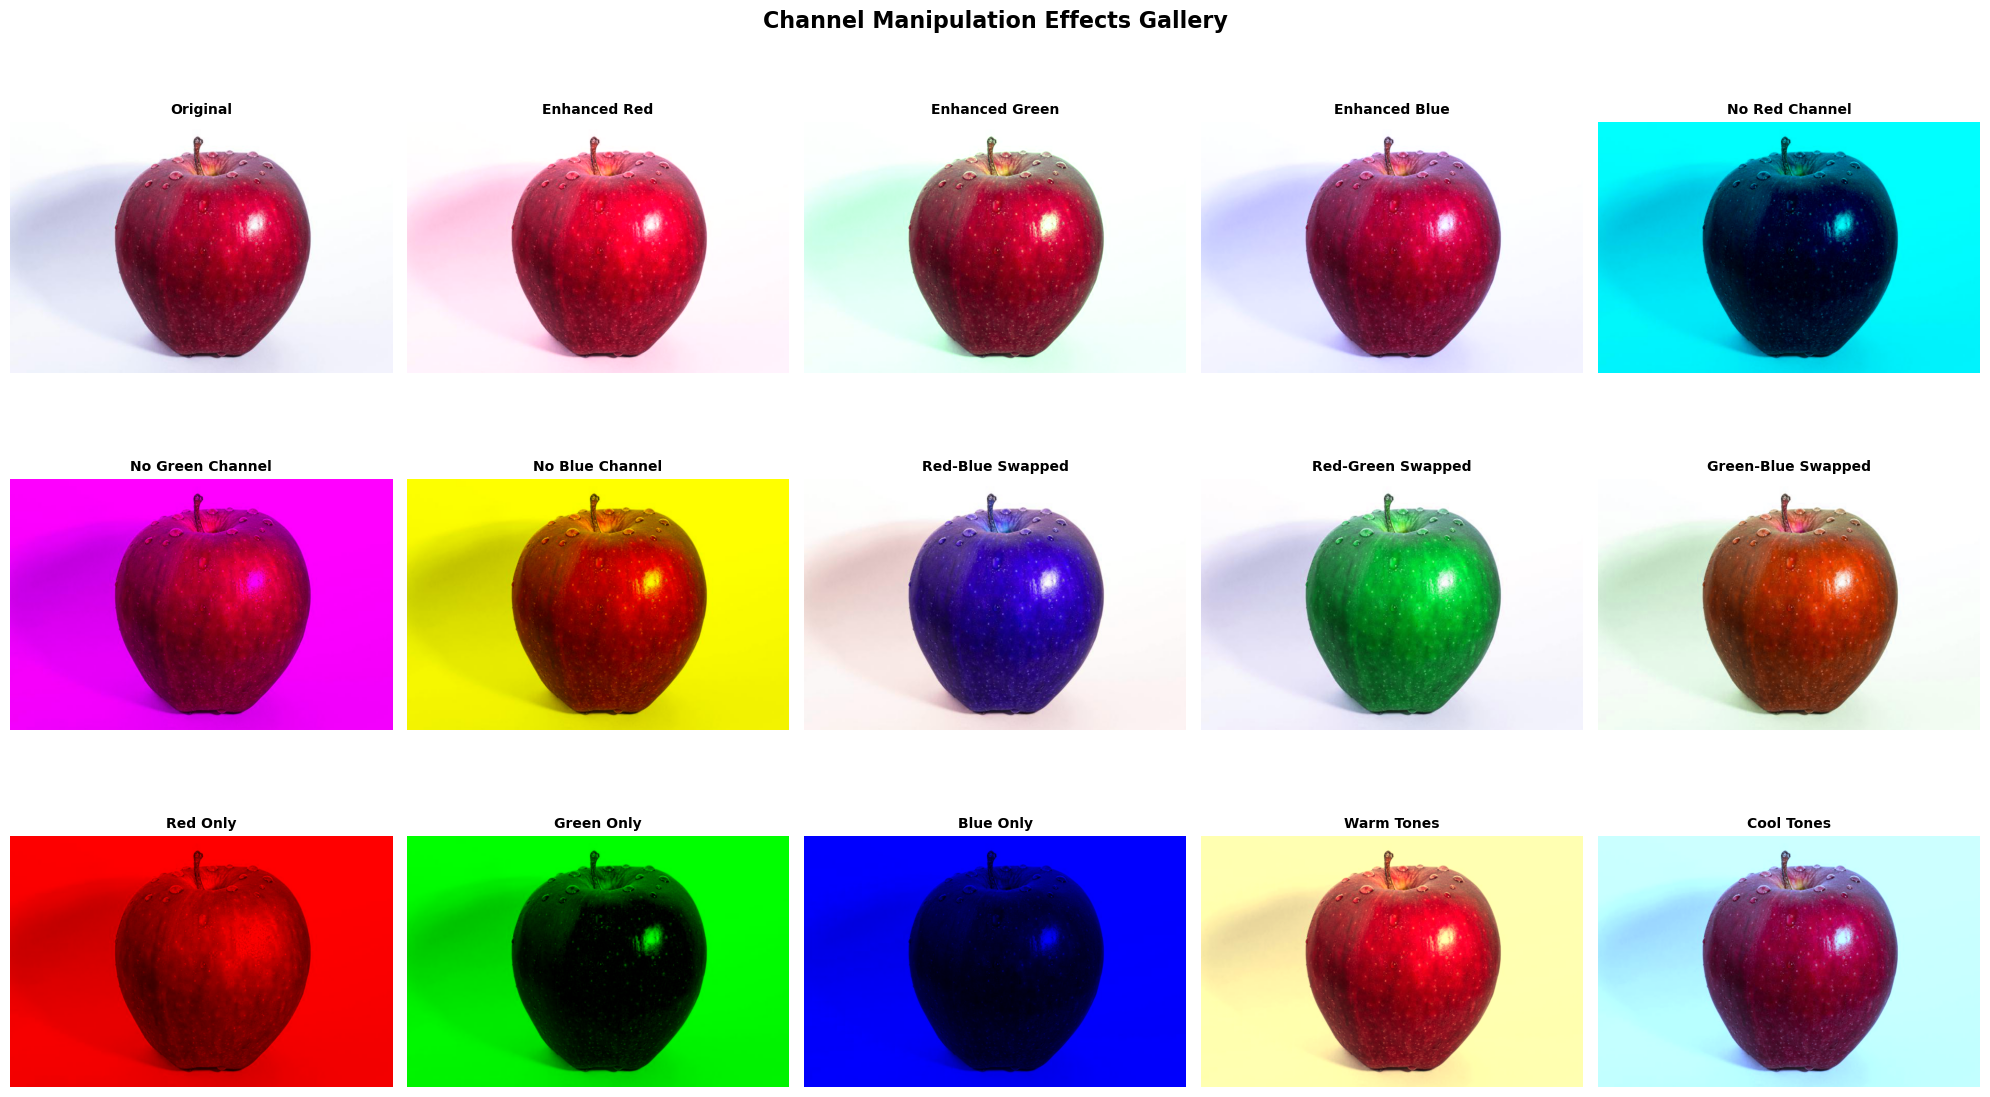

✅ Channel manipulation effects completed!
💾 15 effects saved individually
💾 Effects gallery saved as 'channel_effects_gallery.png'

🎯 Practical Applications Demonstrated:
   • Color Enhancement     : Boosting specific channels for vivid colors
   • Color Filtering       : Removing channels for artistic effects
   • Channel Swapping      : Creating surreal color schemes
   • Monochromatic Effects : Isolating single channels
   • Tone Adjustment       : Warm/cool color temperature effects


In [8]:
print("🎨 Applying channel manipulation and creative effects...")

img_bgr    = cv2.imread('../assets/input-images/image1.png')
output_dir = '../assets/outputs/02_rgb_channel_operations'

def enhance_channel(img, channel_idx, factor):
    img_copy = img.copy()
    img_copy[:, :, channel_idx] = np.clip(img_copy[:, :, channel_idx] * factor, 0, 255)
    return img_copy

def suppress_channel(img, channel_idx):
    img_copy = img.copy()
    img_copy[:, :, channel_idx] = 0
    return img_copy

def swap_channels(img, idx1, idx2):
    img_copy = img.copy()
    img_copy[:, :, idx1], img_copy[:, :, idx2] = img[:, :, idx2], img[:, :, idx1]
    return img_copy

def isolate_channel(img, channel_idx):
    mono = np.zeros_like(img)
    mono[:, :, channel_idx] = img[:, :, channel_idx]
    return mono

def apply_warm_tones(img):
    img_copy = img.copy().astype(np.float32)
    img_copy[:, :, 0] *= 0.7  # Reduce blue
    img_copy[:, :, 1] = np.clip(img_copy[:, :, 1] * 1.1, 0, 255)  # Slightly boost green
    img_copy[:, :, 2] = np.clip(img_copy[:, :, 2] * 1.2, 0, 255)  # Boost red
    return img_copy.astype(np.uint8)

def apply_cool_tones(img):
    img_copy = img.copy().astype(np.float32)
    img_copy[:, :, 0] = np.clip(img_copy[:, :, 0] * 1.3, 0, 255)  # Boost blue
    img_copy[:, :, 1] = np.clip(img_copy[:, :, 1] * 1.1, 0, 255)  # Slightly boost green
    img_copy[:, :, 2] *= 0.8  # Reduce red
    return img_copy.astype(np.uint8)

if img_bgr is not None:
    print("🔧 Creating various channel manipulation effects...")
    
    effects = [
        ("Original", img_bgr),
        ("Enhanced Red", enhance_channel(img_bgr, 2, 1.3)),
        ("Enhanced Green", enhance_channel(img_bgr, 1, 1.4)),
        ("Enhanced Blue", enhance_channel(img_bgr, 0, 1.2)),
        
        ("No Red Channel", suppress_channel(img_bgr, 2)),
        ("No Green Channel", suppress_channel(img_bgr, 1)),
        ("No Blue Channel", suppress_channel(img_bgr, 0)),
        
        ("Red-Blue Swapped", swap_channels(img_bgr, 0, 2)),
        ("Red-Green Swapped", swap_channels(img_bgr, 1, 2)),
        ("Green-Blue Swapped", swap_channels(img_bgr, 0, 1)),
        
        ("Red Only", isolate_channel(img_bgr, 2)),
        ("Green Only", isolate_channel(img_bgr, 1)),
        ("Blue Only", isolate_channel(img_bgr, 0)),
        
        ("Warm Tones", apply_warm_tones(img_bgr)),
        ("Cool Tones", apply_cool_tones(img_bgr)),
    ]
    
    print(f"🖼️ Displaying {len(effects)} different channel effects...")
    print("💡 Press any key to advance through effects...")
    
    for name, effect in effects:
        cv2.imshow(f'Channel Effect: {name}', effect.astype(np.uint8))
        cv2.waitKey(0)
        filename = name.lower().replace(' ', '_').replace('-', '_')
        cv2.imwrite(os.path.join(output_dir, f'effect_{filename}.png'), effect.astype(np.uint8))
    
    cv2.destroyAllWindows()
    
    # === Display grid using Matplotlib ===
    print("📊 Creating comprehensive effects visualization...")
    
    fig, axes = plt.subplots(3, 5, figsize=(20, 12))
    fig.suptitle('Channel Manipulation Effects Gallery', fontsize=16, fontweight='bold')
    
    for i, (name, effect) in enumerate(effects):
        row, col = divmod(i, 5)
        effect_rgb = cv2.cvtColor(effect.astype(np.uint8), cv2.COLOR_BGR2RGB)
        axes[row, col].imshow(effect_rgb)
        axes[row, col].set_title(name, fontweight='bold', fontsize=10)
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'channel_effects_gallery.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Channel manipulation effects completed!")
    print(f"💾 {len(effects)} effects saved individually")
    print("💾 Effects gallery saved as 'channel_effects_gallery.png'")
    
    # === Practical Applications ===
    print("\n🎯 Practical Applications Demonstrated:")
    print("   • Color Enhancement     : Boosting specific channels for vivid colors")
    print("   • Color Filtering       : Removing channels for artistic effects")
    print("   • Channel Swapping      : Creating surreal color schemes")
    print("   • Monochromatic Effects : Isolating single channels")
    print("   • Tone Adjustment       : Warm/cool color temperature effects")

else:
    print("❌ No image available for channel manipulation")

## **5. BGR ↔ RGB Conversion Workflows**

Master the essential conversions between BGR and RGB formats for different libraries and applications.

🔄 Demonstrating BGR ↔ RGB conversion workflows...
📚 Understanding Color Format Differences:
   • OpenCV uses BGR (Blue-Green-Red) format
   • Matplotlib/PIL/Web use RGB (Red-Green-Blue) format
   • Conversion is essential for proper color display
🔧 Different Conversion Methods:
✅ Method 1: cv2.cvtColor() - Most efficient and reliable
✅ Method 2: Array slicing [:, :, ::-1] - Quick but less explicit
✅ Method 3: Manual channel swapping - Educational but verbose

🔍 Verifying Conversion Accuracy:
   • cvtColor vs Array slicing: ✅ Identical
   • cvtColor vs Manual swap: ✅ Identical

📊 Creating BGR vs RGB comparison...


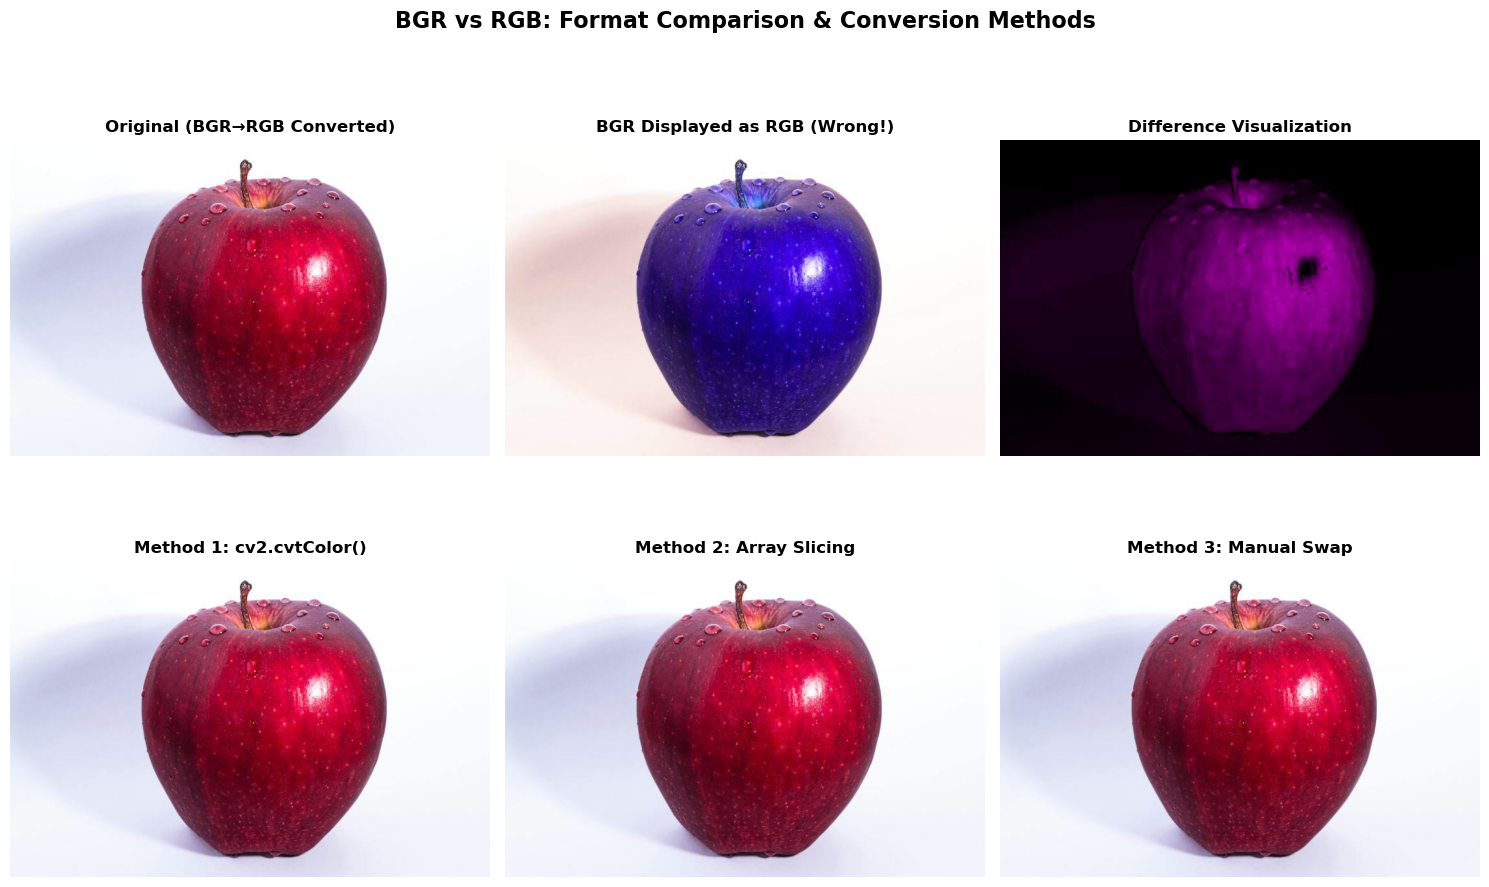


🔄 Practical Workflow Examples:

📊 Workflow 1: OpenCV → Matplotlib Display
   Code: img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
         plt.imshow(img_rgb)

🖼️ Workflow 2: OpenCV → PIL/Pillow
   Code: img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
         pil_img = Image.fromarray(img_rgb)
   ✅ PIL conversion successful
   💾 PIL image saved

🌐 Workflow 3: RGB (Web/Matplotlib) → OpenCV
   Code: img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
   ✅ RGB to BGR conversion successful

⚡ Performance Comparison:
   • cv2.cvtColor()     : 0.6283s (1000 iterations)
   • Array slicing      : 0.0010s (1000 iterations)
   • Performance ratio  : 0.00x faster

💡 Best Practices for Color Format Handling:
   ✅ Always use cv2.cvtColor() for conversions (most reliable)
   ✅ Remember: OpenCV = BGR, Everything else = RGB
   ✅ Convert immediately after loading with OpenCV for other libraries
   ✅ Check image format before displaying or processing
   ✅ Use consistent naming conventions (img_b

In [ ]:
print("🔄 Demonstrating BGR ↔ RGB conversion workflows...")

if img_bgr is not None:
    
    # === INTRODUCTION ===
    print("📚 Understanding Color Format Differences:")
    print("   • OpenCV uses BGR (Blue-Green-Red) format")
    print("   • Matplotlib/PIL/Web use RGB (Red-Green-Blue) format") 
    print("   • Conversion is essential for proper color display")
    
    # === CONVERSION METHODS ===    
    print("🔧 Different Conversion Methods:")
    
    # Method 1: OpenCV cvtColor (recommended)
    img_rgb_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    print("✅ Method 1: cv2.cvtColor() - Most efficient and reliable")
    
    # Method 2: Channel indexing
    img_rgb_manual = img_bgr[:, :, ::-1]  # Reverse channel order
    print("✅ Method 2: Array slicing [:, :, ::-1] - Quick but less explicit")
    
    # Method 3: Manual channel swapping
    img_rgb_swap = img_bgr.copy()
    img_rgb_swap[:, :, 0], img_rgb_swap[:, :, 2] = img_bgr[:, :, 2], img_bgr[:, :, 0]
    print("✅ Method 3: Manual channel swapping - Educational but verbose")
    
    # === VERIFICATION ===
    print("\n🔍 Verifying Conversion Accuracy:")
    
    method1_equal = np.array_equal(img_rgb_cv, img_rgb_manual)
    method2_equal = np.array_equal(img_rgb_cv, img_rgb_swap)
    
    print(f"   • cvtColor vs Array slicing: {'✅ Identical' if method1_equal else '❌ Different'}")
    print(f"   • cvtColor vs Manual swap: {'✅ Identical' if method2_equal else '❌ Different'}")
    
    # === VISUALIZATION COMPARISON ===
    print("\n📊 Creating BGR vs RGB comparison...")
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('BGR vs RGB: Format Comparison & Conversion Methods', fontsize=16, fontweight='bold')
    
    # Row 1
    axes[0, 0].imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  # Correct RGB display
    axes[0, 0].set_title('Original (BGR→RGB Converted)', fontweight='bold')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(img_bgr)  # Wrong color display
    axes[0, 1].set_title('BGR Displayed as RGB (Wrong!)', fontweight='bold')
    axes[0, 1].axis('off')
    
    diff_img = np.abs(img_bgr.astype(np.float32) - img_rgb_cv.astype(np.float32)).astype(np.uint8)
    axes[0, 2].imshow(diff_img)
    axes[0, 2].set_title('Difference Visualization', fontweight='bold')
    axes[0, 2].axis('off')
    
    # Row 2
    axes[1, 0].imshow(img_rgb_cv)
    axes[1, 0].set_title('Method 1: cv2.cvtColor()', fontweight='bold')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(img_rgb_manual)
    axes[1, 1].set_title('Method 2: Array Slicing', fontweight='bold')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(img_rgb_swap)
    axes[1, 2].set_title('Method 3: Manual Swap', fontweight='bold')
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.savefig('../assets/outputs/02_rgb_channel_operations/bgr_rgb_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # === PRACTICAL WORKFLOW EXAMPLES ===
    print("\n🔄 Practical Workflow Examples:")
    
    # Workflow 1: OpenCV → Matplotlib
    print("\n📊 Workflow 1: OpenCV → Matplotlib Display")
    print("   Code: img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)")
    print("         plt.imshow(img_rgb)")
    
    # Workflow 2: OpenCV → PIL
    print("\n🖼️ Workflow 2: OpenCV → PIL/Pillow")
    try:
        from PIL import Image
        img_rgb_pil = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        pil_image = Image.fromarray(img_rgb_pil)
        print("   Code: img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)")
        print("         pil_img = Image.fromarray(img_rgb)")
        print("   ✅ PIL conversion successful")
        
        pil_image.save('../assets/outputs/02_rgb_channel_operations/converted_via_pil.png')
        print("   💾 PIL image saved")
    except ImportError:
        print("   ⚠️ PIL not available - install with: pip install Pillow")
    
    # Workflow 3: Web/matplotlib → OpenCV
    print("\n🌐 Workflow 3: RGB (Web/Matplotlib) → OpenCV")
    print("   Code: img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)")
    img_bgr_converted = cv2.cvtColor(img_rgb_cv, cv2.COLOR_RGB2BGR)
    print("   ✅ RGB to BGR conversion successful")
    
    # === PERFORMANCE COMPARISON ===
    print("\n⚡ Performance Comparison:")
    import time
    
    test_iterations = 1000
    
    start_time = time.time()
    for _ in range(test_iterations):
        _ = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    cv_time = time.time() - start_time
    
    start_time = time.time()
    for _ in range(test_iterations):
        _ = img_bgr[:, :, ::-1]
    slice_time = time.time() - start_time
    
    print(f"   • cv2.cvtColor()     : {cv_time:.4f}s ({test_iterations} iterations)")
    print(f"   • Array slicing      : {slice_time:.4f}s ({test_iterations} iterations)")
    print(f"   • Performance ratio  : {slice_time/cv_time:.2f}x {'faster' if slice_time < cv_time else 'slower'}")
    
    # === BEST PRACTICES ===
    print("\n💡 Best Practices for Color Format Handling:")
    print("   ✅ Always use cv2.cvtColor() for conversions (most reliable)")
    print("   ✅ Remember: OpenCV = BGR, Everything else = RGB")
    print("   ✅ Convert immediately after loading with OpenCV for other libraries")
    print("   ✅ Check image format before displaying or processing")
    print("   ✅ Use consistent naming conventions (img_bgr, img_rgb)")
    
    # Save conversion examples
    cv2.imwrite('../assets/outputs/02_rgb_channel_operations/original_bgr.png', img_bgr)
    cv2.imwrite('../assets/outputs/02_rgb_channel_operations/converted_rgb.png', cv2.cvtColor(img_rgb_cv, cv2.COLOR_RGB2BGR))
    
    print("\n✅ BGR ↔ RGB conversion workflows completed!")
    print("💾 Comparison visualizations and examples saved")

else:
    print("❌ No image available for conversion demonstration")

## **6. Summary & Professional Applications**

### Channel Operations Mastery Achieved:

| Operation | Purpose | Key Functions | Applications |
|-----------|---------|---------------|--------------|
| **Channel Separation** | Isolate color components | `img[:,:,0]`, `img[:,:,1]`, `img[:,:,2]` | Analysis, debugging, effects |
| **Channel Analysis** | Understand color distribution | `cv2.calcHist()`, statistical analysis | Image quality assessment |
| **Channel Enhancement** | Boost specific colors | Multiplication, clipping | Color correction, artistic effects |
| **Channel Suppression** | Remove color components | Set channel to 0 | Color filtering, special effects |
| **Channel Swapping** | Rearrange color order | Index manipulation | Surreal effects, false color |
| **Format Conversion** | BGR ↔ RGB compatibility | `cv2.cvtColor()` | Library interoperability |

### Professional Applications:

#### 🔬 **Computer Vision & Analysis**
- **Image Quality Assessment**: Analyzing channel balance and distribution
- **Color-based Segmentation**: Isolating objects by color characteristics
- **Medical Imaging**: False color rendering for enhanced visualization
- **Satellite Imagery**: Multispectral analysis and vegetation indices

#### 🎨 **Creative & Artistic Applications**
- **Photo Enhancement**: Selective color boosting and correction
- **Artistic Effects**: Channel swapping for surreal imagery
- **Color Grading**: Film and photography post-processing
- **Instagram-style Filters**: Warm/cool tone adjustments

#### 🖥️ **Technical & Scientific Uses**
- **Fluorescence Microscopy**: Channel analysis for biological samples
- **Astronomy**: False color imaging for stellar photography
- **Industrial Inspection**: Color-based quality control
- **Remote Sensing**: Environmental monitoring and analysis

### Advanced Techniques Demonstrated:

1. **Statistical Channel Analysis**
   - Histogram computation and interpretation
   - Peak intensity identification
   - Distribution characterization
   - Brightness range analysis

2. **Creative Channel Manipulation**
   - Selective enhancement techniques
   - Color temperature adjustments
   - Monochromatic isolations
   - Artistic channel combinations

3. **Format Conversion Mastery**
   - Multiple conversion methods
   - Performance optimization
   - Library compatibility workflows
   - Error prevention strategies

### Channel Operation Best Practices:

#### 🎯 **Technical Guidelines**
- **Always use `cv2.cvtColor()`** for BGR↔RGB conversions
- **Check data types** before mathematical operations
- **Use `np.clip()`** to prevent overflow in enhancement
- **Maintain original image** with `.copy()` before modifications

#### 📊 **Analysis Workflows**
- **Examine histograms** before applying enhancements
- **Compare channels** to understand color balance
- **Use statistical measures** for objective assessment
- **Document channel modifications** for reproducibility

#### 🎨 **Creative Applications**
- **Understand color theory** for effective enhancements
- **Test effects on different image types**
- **Combine multiple techniques** for complex effects
- **Save intermediate results** for comparison

### Common Challenges & Solutions 🤔:

| Challenge | Cause | Solution |
|-----------|-------|----------|
| **Wrong colors in display** | BGR displayed as RGB | Always convert: `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` |
| **Overexposed enhancements** | Channel values > 255 | Use `np.clip(values, 0, 255)` |
| **Harsh color transitions** | Extreme channel modifications | Apply gradual adjustments |
| **Loss of detail** | Excessive suppression | Preserve some channel information |
| **Performance issues** | Inefficient operations | Use vectorized NumPy operations |

### Integration with Other OpenCV Operations:

1. **Preprocessing Pipeline**
   ```python
   # Load → Convert → Enhance → Process
   img_bgr = cv2.imread('image.jpg')
   img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
   img_enhanced = enhance_channels(img_rgb)
   result = process_image(img_enhanced)
   ```

2. **Computer Vision Workflow**
   ```python
   # Channel analysis → Segmentation → Detection
   analyze_channels(img)
   mask = create_color_mask(img, channel_thresholds)
   objects = detect_objects(img, mask)
   ```

### Performance Optimization Tips:

- **Use in-place operations** when possible: `img[:,:,0] *= 1.2`
- **Vectorize calculations** instead of loops
- **Process smaller regions** for real-time applications
- **Cache conversion results** for repeated use
- **Consider GPU acceleration** for large datasets

### Next Steps for Advanced Learning:

1. **Color Space Exploration**: HSV, LAB, YUV channel operations
2. **Advanced Filtering**: Bilateral and edge-preserving filters
3. **Machine Learning Integration**: Channel features for classification
4. **Real-time Processing**: Video stream channel manipulation
5. **Multi-spectral Analysis**: Beyond RGB for scientific applications

---

**✅ Channel Operations Expertise Achieved!**

You now possess comprehensive skills in:
- **Analyzing** color channel distributions and characteristics
- **Manipulating** individual channels for enhancement and effects
- **Converting** between BGR and RGB formats seamlessly
- **Creating** professional visualizations and comparisons
- **Applying** channel operations to real-world problems

### 🎉 **Portfolio Components Created:**
- Complete channel analysis workflow
- 15+ creative effect demonstrations
- Performance comparison studies
- Professional visualization galleries
- Best practices documentation

**Master the colors, master the vision!** 🌈